In [1]:
import os, sys
sys.path.append('../')
import geopandas as gpd
import matplotlib.pyplot as plt
from utils.modeling import fit_iterative_density_model

In [2]:
pth = os.path.join('..', 'data', 'geodataframe.gpkg')
gdf = gpd.read_file(pth); gdf

,city,state,country,latitude,longitude,population,msa,US,geometry
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...,True,POINT (-8207971.222 5067414.863)
1,seven hills,ohio,united states,41.39533,-81.67624,11690,None,True,POINT (-9092157.447 5070828.79)
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,None,True,POINT (-9001026.859 4814418.565)
3,sint anthonis,north brabant,netherlands,51.62667,5.88194,3340,None,False,POINT (654774.566 6732902.058)
4,machali,o higgins region,chile,-34.18082,-70.64933,27595,None,False,POINT (-7864647.44 -4053107.653)
...,...,...,...,...,...,...,...,...,...
24022,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA,True,POINT (-10813762.352 3837467.237)
24023,belfast,maine,united states,44.42591,-69.00642,6682,None,True,POINT (-7681759.536 5531591.056)
24024,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA,True,POINT (-9334258.415 5321578.2)
24025,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA,True,POINT (-9369783.804 4003071.597)


In [3]:
# iterative density-based clustering with DBSCAN
eps_dbscan = 30e3          # 30 km max distance
min_samples_dbscan = 1e6   # 1m min population
mean_dpc = fit_iterative_density_model(gdf = gdf,
                                       eps_dbscan = eps_dbscan,         
                                       min_samples_dbscan = min_samples_dbscan,
                                       n_iter = 500,
                                       return_metrics = True)

  0%|          | 0/500 [00:00<?, ?it/s]

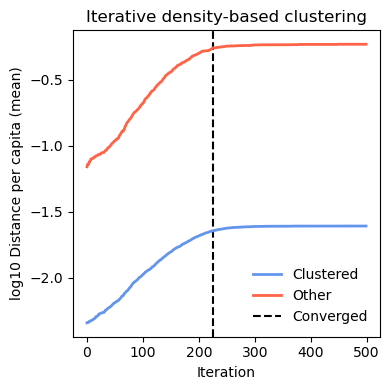

In [12]:
n_iter_converge = 225
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.plot(mean_dpc[:, 0], lw = 2, color = 'cornflowerblue', label = 'Clustered')
ax.plot(mean_dpc[:, 1], lw = 2, color = 'tomato', label = 'Other')
ax.axvline(n_iter_converge, c = 'k', ls = '--', zorder = 0, label = 'Converged')
ax.set_ylabel('log10 Distance per capita (mean)')
ax.set_xlabel('Iteration')
ax.set_title('Iterative density-based clustering')
ax.legend(frameon = False)
plt.tight_layout() 
plt.show()

In [13]:
# final clustering (to convergence)
gdf = fit_iterative_density_model(gdf = gdf,
                                  eps_dbscan = eps_dbscan,
                                  min_samples_dbscan = min_samples_dbscan,
                                  n_iter = n_iter_converge,
                                  return_gdf = True)

  0%|          | 0/225 [00:00<?, ?it/s]

In [16]:
gdf.to_file(os.path.join('..', 'data', 'geodataframe_density.gpkg'), driver = 'GPKG')